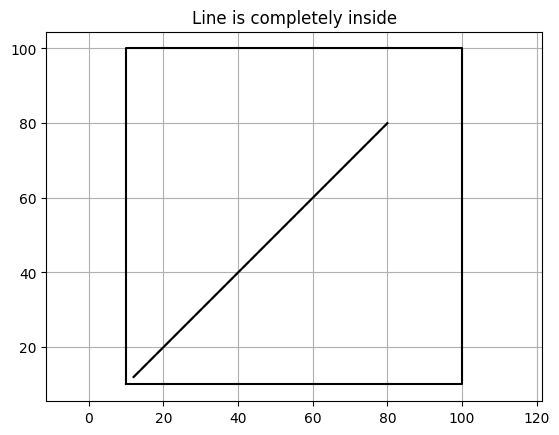

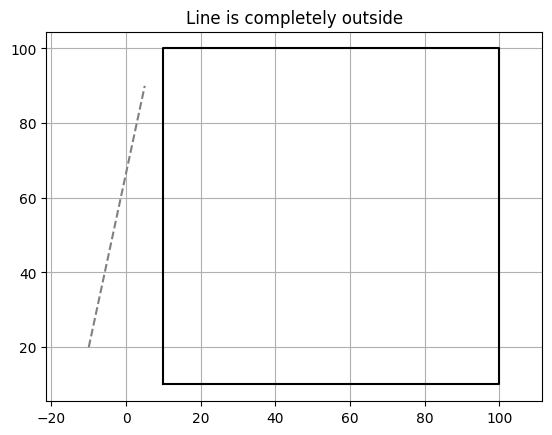

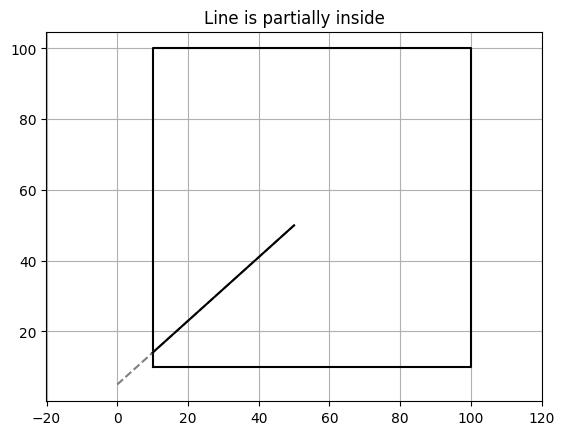

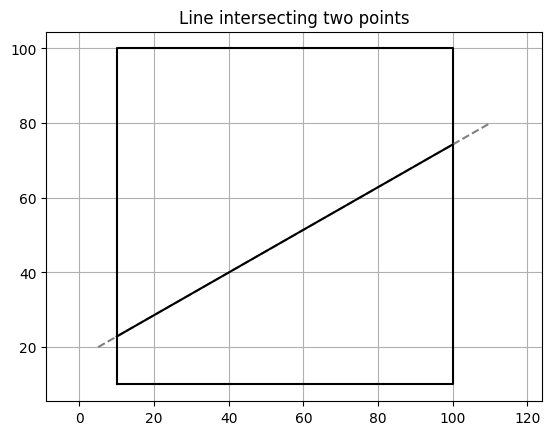

In [4]:
import matplotlib.pyplot as plt
INSIDE, LEFT, RIGHT, BOTTOM, TOP = 0, 1, 2, 4, 8

def find_code(x, y, xmin, ymin, xmax, ymax):
    code = INSIDE
    if x < xmin:
        code += LEFT
    elif x > xmax:
        code += RIGHT
    if y < ymin:
        code += BOTTOM
    elif y > ymax:
        code += TOP
    return code
def cohen_sutherland(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
    code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)
    while True:
        if code1 == 0 and code2 == 0:
            return x1, y1, x2, y2
        if code1 & code2:
            return None
        code_out = code1 if code1 else code2
        if code_out & TOP:
            x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
            y = ymax
        elif code_out & BOTTOM:
            x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
            y = ymin
        elif code_out & RIGHT:
            y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
            x = xmax
        else:  # LEFT
            y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
            x = xmin

        if code_out == code1:
            x1, y1 = x, y
            code1 = find_code(x1, y1, xmin, ymin, xmax, ymax)
        else:
            x2, y2 = x, y
            code2 = find_code(x2, y2, xmin, ymin, xmax, ymax)

def draw(original, clipped, xmin, ymin, xmax, ymax, title):
    plt.figure()
    plt.plot(
        [xmin, xmax, xmax, xmin, xmin],
        [ymin, ymin, ymax, ymax, ymin],
        color='black'
    )

    x1, y1, x2, y2 = original
    plt.plot([x1, x2], [y1, y2], '--', color='grey')

    if clipped:
        cx1, cy1, cx2, cy2 = clipped
        plt.plot([cx1, cx2], [cy1, cy2], color='black')

    plt.title(title)
    plt.axis("equal")
    plt.grid(True)
    plt.show()


xmin, ymin, xmax, ymax = 10, 10, 100,100
cases = [
    ((12, 12, 80, 80), "Line is completely inside"),
    ((-10, 20, 5, 90), "Line is completely outside"),
    ((0, 5, 50, 50), "Line is partially inside"),
    ((5, 20, 110, 80), "Line intersecting two points")
]

for original, title in cases:
    clipped = cohen_sutherland(*original, xmin, ymin, xmax, ymax)
    draw(original, clipped, xmin, ymin, xmax, ymax, title)
